# Streaming Histogram
The streaming histogram is a data structure that takes in a single data point and updates the internal histogram
structure. This histogram is a variant of the Ben-Haim, Tom-Tov histogram.

In [4]:
from KML.data_structures.histograms.StreamingHistogram import PyStreamingHistogram as pyhist
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

## Define Histogram

In [7]:
num_bins = 100
window_size = 50
hist = pyhist(num_bins, window_size)

## Define data

In [22]:
np.random.seed(42)
data = np.random.randn(1000)

## Show distribution in batch setting

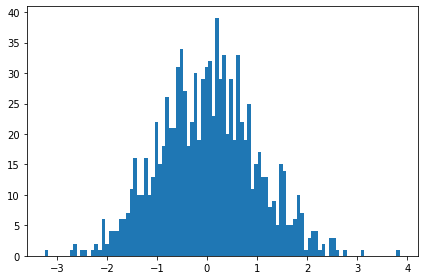

In [30]:
fig, ax = plt.subplots(1, tight_layout=True)
_ = ax.hist(data, bins=num_bins)

## Show distribution with batch in streaming histogram

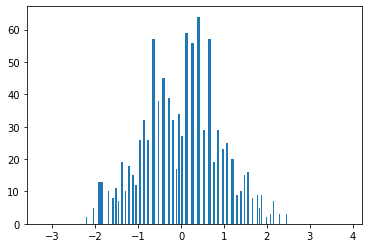

In [44]:
# hist = pyhist(num_bins, data.shape[0])
# hist.update(data)
# hist.bin_counts()
# hist.pdf(True, False)
from river.misc import histogram
hist = histogram.Histogram(max_bins=60)

for x in data:
    hist = hist.update(x)
    
ax = plt.bar(
    x=[(b.left + b.right) / 2 for b in hist],
    height=[b.count for b in hist],
    width=[(b.right - b.left) / 2 for b in hist]
)

In [46]:
hist.count

<bound method UserList.count of [-3.24127, -3.24127]: 1
[-2.69689, -2.69689]: 1
[-2.65097, -2.61975]: 2
[-2.47164, -2.47164]: 1
[-2.42388, -2.42388]: 1
[-2.30192, -2.30192]: 1
[-2.21114, -2.19881]: 2
[-2.12390, -2.12390]: 1
[-2.08193, -2.07339]: 2
[-2.06744, -2.02514]: 5
[-1.98757, -1.75874]: 13
[-1.72492, -1.65486]: 10
[-1.62754, -1.55663]: 8
[-1.55066, -1.47859]: 11
[-1.47852, -1.43014]: 7
[-1.42475, -1.33534]: 19
[-1.32819, -1.27675]: 10
[-1.26088, -1.18326]: 18
[-1.16868, -1.08106]: 15
[-1.07774, -1.02123]: 12
[-1.01283, -0.92217]: 26
[-0.91942, -0.81581]: 32
[-0.80849, -0.72574]: 26
[-0.71984, -0.56247]: 57
[-0.56229, -0.48423]: 38
[-0.47917, -0.35151]: 45
[-0.34271, -0.23682]: 39
[-0.23459, -0.14238]: 32
[-0.13826, -0.08215]: 17
[-0.07710, -0.01642]: 34
[-0.01350, 0.05572]: 27
[0.05821, 0.19655]: 59
[0.19686, 0.32272]: 56
[0.32408, 0.49332]: 64
[0.49671, 0.58393]: 29
[0.58686, 0.72577]: 57
[0.73847, 0.79166]: 19
[0.81253, 0.89960]: 29
[0.91540, 1.02916]: 23
[1.03100, 1.12657]: 25

# Show Animation of Histogram Working

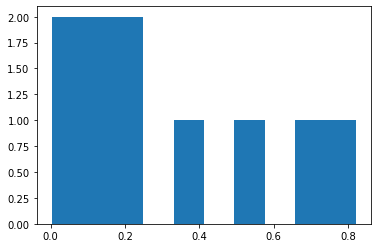

In [5]:
n = 100
number_of_frames = 10
data = np.random.rand(n, number_of_frames)

def update_hist(num, data):
    plt.cla()
    plt.hist(data[num])

fig = plt.figure()
hist = plt.hist(data[0])

animation = animation.FuncAnimation(fig, update_hist, number_of_frames, fargs=(data, ) )
plt.show()